In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet, plot, from_contents
from collections import defaultdict

In [2]:
from upsetplot import from_contents
contents = {'cat1': ['a', 'b', 'c'],
            'cat2': ['b', 'd'],
            'cat3': ['e']}
example = from_contents(contents) # doctest: +NORMALIZE_WHITESPACE

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

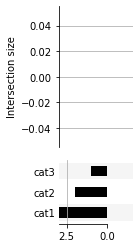

In [3]:
plot(example)

In [4]:
df = pd.read_csv("../counts/2ind4CCR/bos_taurus_bsj_counts.tsv", sep="\t").drop(columns=['gene_id', 'circ_type']).set_index('bsj')

In [5]:
df.head()

,bta_liver_1,bta_liver_10,bta_liver_11,bta_liver_12,bta_liver_13,bta_liver_14,bta_liver_15,bta_liver_2,bta_liver_3,bta_liver_4,...,bta_muscle_6,bta_muscle_7,bta_muscle_8,bta_muscle_9,bta_testis_1,bta_testis_2,bta_testis_3,bta_testis_4,bta_testis_5,bta_testis_6
bsj,,,,,,,,,,,,,,,,,,,,,
8:53760250|53780903,3.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,...,0.0,1.0,0.0,0.0,10.0,7.0,15.0,7.0,3.0,4.0
6:88488565|88500819,2.0,4.0,3.0,2.0,0.0,3.0,0.0,0.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11:7392326|7392528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,3.0,4.0,8.0,0.0,1.0,2.0,0.0,0.0,0.0
12:76953695|76967469,36.0,15.0,42.0,40.0,21.0,36.0,18.0,29.0,40.0,79.0,...,4.0,3.0,5.0,1.0,94.0,77.0,89.0,22.0,31.0,22.0
24:61162997|61187749,10.0,12.0,17.0,10.0,4.0,5.0,12.0,10.0,12.0,22.0,...,3.0,3.0,0.0,1.0,112.0,50.0,97.0,14.0,53.0,31.0


In [6]:
liver = (df.filter(regex="liver").max(axis=1)>10)
muscle = (df.filter(regex="muscle").max(axis=1)>10)
testis = (df.filter(regex="testis").max(axis=1)>10)

In [7]:
subset_df = df[liver | muscle][["bta_liver_2", "bta_liver_3", "bta_muscle_3", "bta_muscle_6"]]

In [8]:
contents = defaultdict(list)
for sample in subset_df.columns:
    contents[sample] = [index for index, value in subset_df[sample].iteritems() if value>4]
upset_values = from_contents(contents)  

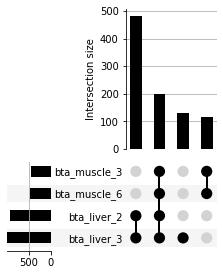

In [9]:
upset = plot(upset_values, sort_by="cardinality")

In [10]:
subset_df = df[liver | testis][["bta_liver_1", "bta_liver_2", "bta_testis_1", "bta_testis_2"]]

In [11]:
contents = defaultdict(list)
for sample in subset_df.columns:
    contents[sample] = [index for index, value in subset_df[sample].iteritems() if value>4]
upset_values = from_contents(contents)  

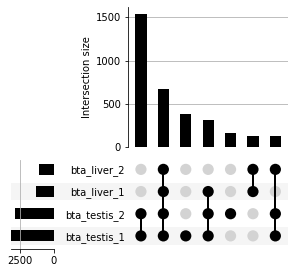

In [12]:
upset = plot(upset_values, sort_by="cardinality")

In [13]:
subset_df = df[liver | testis | muscle][["bta_muscle_3", "bta_muscle_6", "bta_liver_1", "bta_liver_2", "bta_testis_1", "bta_testis_2"]]

In [14]:
contents = defaultdict(list)
for sample in subset_df.columns:
    contents[sample] = [index for index, value in subset_df[sample].iteritems() if value>4]
upset_values = from_contents(contents)  

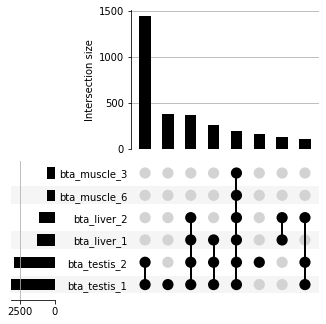

In [15]:
upset = plot(upset_values, sort_by="cardinality")

In [16]:
df = pd.read_csv("../counts/2ind4CCR/sus_scrofa_bsj_counts.tsv", sep="\t").drop(columns=['gene_id', 'circ_type']).set_index('bsj')

In [17]:
df.head()

,ssc_liver_1,ssc_liver_10,ssc_liver_2,ssc_liver_3,ssc_liver_4,ssc_liver_5,ssc_liver_6,ssc_liver_7,ssc_liver_8,ssc_liver_9,...,ssc_testis_1,ssc_testis_10,ssc_testis_2,ssc_testis_3,ssc_testis_4,ssc_testis_5,ssc_testis_6,ssc_testis_7,ssc_testis_8,ssc_testis_9
bsj,,,,,,,,,,,,,,,,,,,,,
14:105901068|105911675,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,8.0,5.0,15.0,9.0,7.0,2.0,3.0,2.0,0.0,0.0
1:113097707|113102025,218.0,52.0,8.0,132.0,22.0,115.0,76.0,128.0,121.0,63.0,...,505.0,207.0,377.0,241.0,222.0,192.0,300.0,253.0,157.0,147.0
2:85507179|85529597,3.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,1.0,0.0,...,3.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10:15061269|15063364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0
8:37826042|37847031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,0.0,1.0,3.0,5.0,1.0,0.0,3.0,0.0,0.0


In [18]:
liver = (df.filter(regex="liver").max(axis=1)>10)
muscle = (df.filter(regex="muscle").max(axis=1)>10)
testis = (df.filter(regex="testis").max(axis=1)>10)

In [19]:
subset_df = df[liver | muscle][["ssc_liver_1", "ssc_liver_3", "ssc_testis_2", "ssc_testis_3"]]

In [20]:
contents = defaultdict(list)
for sample in subset_df.columns:
    contents[sample] = [index for index, value in subset_df[sample].iteritems() if value>4]
upset_values = from_contents(contents)  

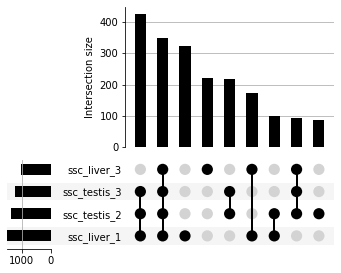

In [21]:
upset = plot(upset_values, sort_by="cardinality")

In [22]:
subset_df = df[liver | testis][["ssc_liver_4", "ssc_liver_5", "ssc_testis_3", "ssc_testis_4"]]

In [23]:
contents = defaultdict(list)
for sample in subset_df.columns:
    contents[sample] = [index for index, value in subset_df[sample].iteritems() if value>4]
upset_values = from_contents(contents)  

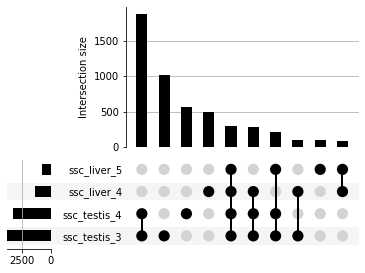

In [24]:
upset = plot(upset_values, sort_by="cardinality")

In [25]:
subset_df = df[liver | testis | muscle][["ssc_liver_1", "ssc_liver_2", "ssc_muscle_3", "ssc_muscle_4", "ssc_testis_3", "ssc_testis_4"]]

In [26]:
contents = defaultdict(list)
for sample in subset_df.columns:
    contents[sample] = [index for index, value in subset_df[sample].iteritems() if value>4]
upset_values = from_contents(contents)  

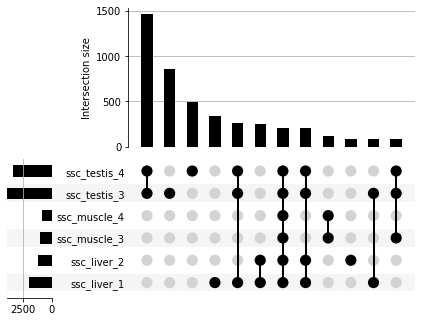

In [27]:
upset = plot(upset_values, sort_by="cardinality", sort_categories_by=None)